### Group 7 Final Project Assignment 
Lexie Corbin,
Geri Harding,
Shamarria Walker, &
Mario Macaluso

In [1]:
!pip install statsmodels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

In [2]:
data = pd.read_csv('heartdisease.csv')

In [3]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Initial Assumptions

Before beginning to work with the data, we assumed there will be a balanced amount of 1s (True) and 0s (False) within the TenYearCHD column. Further, we assume total cholestorol, sysBP and diaBP will be highly correlated with TenYearCHD, with a high value of those attributes highly contributing to an individual's risk of developing heart disease in the next 10 years.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


### Data Wrangling

The data was mostly consistent as only 7 out of the 15 columns contained missing values. None of the columns that contained missing values were missing more than 10% of data and the TenYearCHD column was not missing any data, so no rows were deleted. 

#### Missing Values:
- education: 105
- cigsPerDay: 29
- BPMeds: 53
- totChol: 50
- BMI: 19
- heartRate: 1
- glucose: 388

To deal with the missing values in the data, the missing values will be replaced with the average of their particular column.

In [5]:
# Printing the Averages
avg_education = data["education"].mean(axis=0)
print("Average of education:", avg_education)

avg_cigsPerDay = data["cigsPerDay"].mean(axis=0)
print("Average of cigsPerDay:", avg_cigsPerDay)

avg_BPMeds= data["BPMeds"].mean(axis=0)
print("Average of BPMeds:", avg_BPMeds)

avg_totChol = data["totChol"].mean(axis=0)
print("Average of totChol:", avg_totChol)

avg_BMI = data["BMI"].mean(axis=0)
print("Average of BMI:", avg_BMI)

avg_heartRate = data["heartRate"].mean(axis=0)
print("Average of heartRate:", avg_heartRate)

avg_glucose = data["glucose"].mean(axis=0)
print("Average of glucose:", avg_glucose)

Average of education: 1.9789499153157513
Average of cigsPerDay: 9.003088619624615
Average of BPMeds: 0.02962962962962963
Average of totChol: 236.72158548233045
Average of BMI: 25.80200758473572
Average of heartRate: 75.87892376681614
Average of glucose: 81.96675324675324


In [6]:
# Replacing NA values with nan
data.replace("NA", np.nan, inplace=True)

In [7]:
# Replacing missing values (nan) with their columns average
data["education"].replace(np.nan, avg_education, inplace=True)
data["cigsPerDay"].replace(np.nan, avg_cigsPerDay, inplace=True)
data["BPMeds"].replace(np.nan, avg_BPMeds, inplace=True)
data["totChol"].replace(np.nan, avg_totChol, inplace=True)
data["BMI"].replace(np.nan, avg_BMI, inplace=True)
data["heartRate"].replace(np.nan, avg_heartRate, inplace=True)
data["glucose"].replace(np.nan, avg_glucose, inplace=True)

C:\Users\lexc1\AppData\Local\Temp\ipykernel_17480\1358052290.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["education"].replace(np.nan, avg_education, inplace=True)
C:\Users\lexc1\AppData\Local\Temp\ipykernel_17480\1358052290.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [8]:
# Checking missing values were replaced
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


### Descriptive Statistics
After wrangling the data and dealing with missing values, all columns contained a count of 4238. The TenYearCHD is skewed as the descriptive statistics show that 75% of the values in that column are 0. In comparison, the male column has 75% of the values being 1 and 50% being 0. This indicates that there is a more balanced amount of 1s and 0s in the column in contrast to the TenYearCHD that has significantly more 0s than 1s.

In [9]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.00000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.02963,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.007075,0.500024,11.879230,0.16852,0.076587,0.462763,0.158316,44.326453,22.038097,11.910850,4.070953,12.025177,22.836603,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.00000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.00000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


### Statistical Data Visualization
In creating these graphs, it is apparent that the rarity of 1s within the TenYearCHD column skews the data. In constrast to our initial assumption, 85% of records are Ten Year CHD negative, resulting heavily skewed data. 

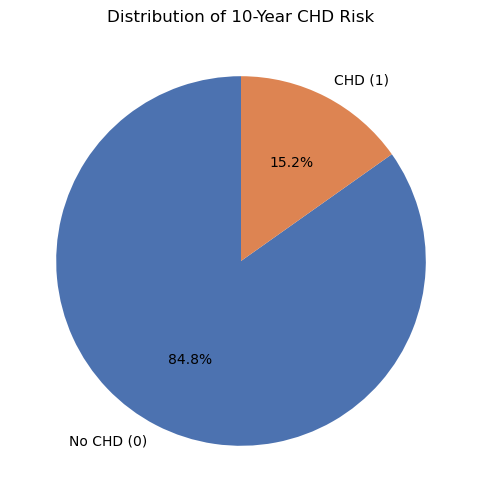

In [10]:

# Count occurrences of TenYearCHD values
chd_counts = data['TenYearCHD'].value_counts()
labels = ['No CHD (0)', 'CHD (1)']

# Create Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(chd_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#4C72B0', '#DD8452'])
plt.title("Distribution of 10-Year CHD Risk")
plt.show()


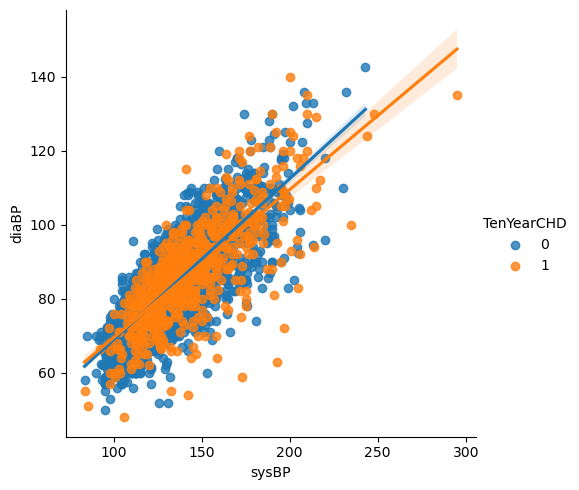

In [11]:
sns.lmplot(x='sysBP', y='diaBP', data=data, hue='TenYearCHD')
plt.show()

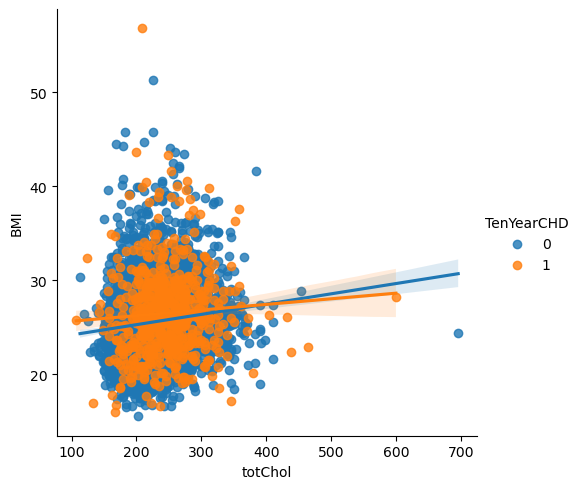

In [12]:
sns.lmplot(x='totChol', y='BMI', data=data, hue='TenYearCHD')

plt.show()

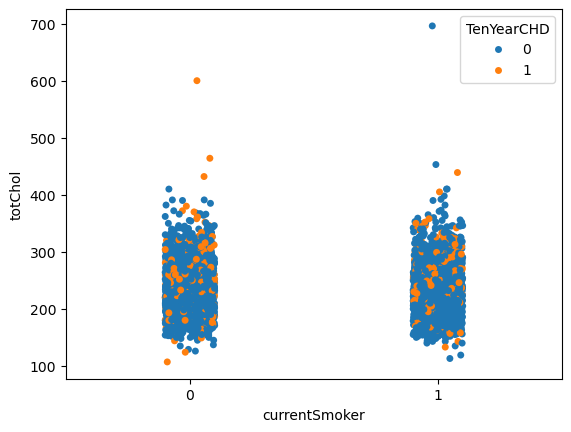

In [13]:
sns.stripplot(x='currentSmoker', y='totChol', data=data, hue='TenYearCHD')
plt.show()

#### Correlation 
Few strong relationships present, with correlation coefficients greater than 0.5. However, many of these variables may be interdependent:
* Current Smoker + Number of Cigs (0.77)
* Sys BP + Prevalent Hyp (0.70)
* dia BP + Prevalent Hyp (0.62)
* Diabetes + Glucose (0.61)

Our target variable, Ten Year CHD, does not display a strong relationship with any one variable. However, its strongest relationships are with age(0.23), sysbP(0.22), prevalentHyp(0.18), diaBP(0.15), and glucose(0.12). These variables are a great starting point for our predictive model.

Due to the natural interdependence of some of the variables, Variance Inflation Factor (VIF), should be performed. 

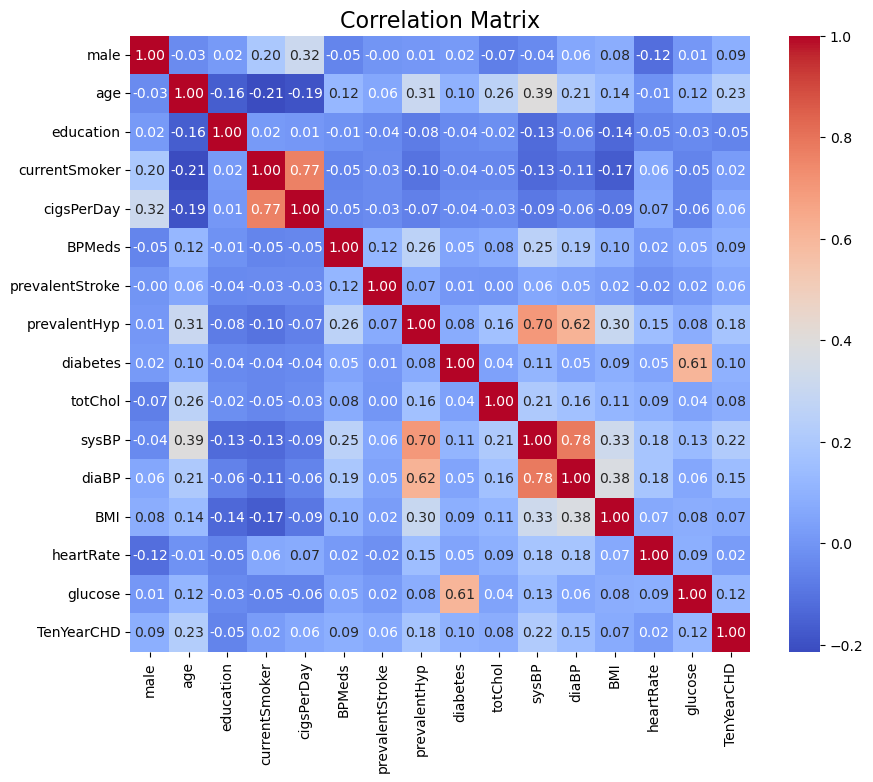

In [14]:
# Create a correlation matrix to reveal relationships between variables

# Select numeric columns only
numeric_data = data.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()


VIF did need yield any useful results as no variable had a VIF exceeding 5. These factors will be reevlated during model refinement. 

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = numeric_data.drop(columns=['TenYearCHD'])  # exclude target
X = add_constant(X)

vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

            Feature         VIF
0             const  198.865426
1              male    1.195320
2               age    1.372419
3         education    1.054653
4     currentSmoker    2.516817
5        cigsPerDay    2.643756
6            BPMeds    1.101547
7   prevalentStroke    1.019222
8      prevalentHyp    2.053320
9          diabetes    1.587214
10          totChol    1.107323
11            sysBP    3.738540
12            diaBP    2.964781
13              BMI    1.235637
14        heartRate    1.096240
15          glucose    1.608642


On average, variables with stronger relationships with Ten Year CHD have lower median values in individuals that are not Ten Year CHD positive. in many histograms and other distribution visualizations 

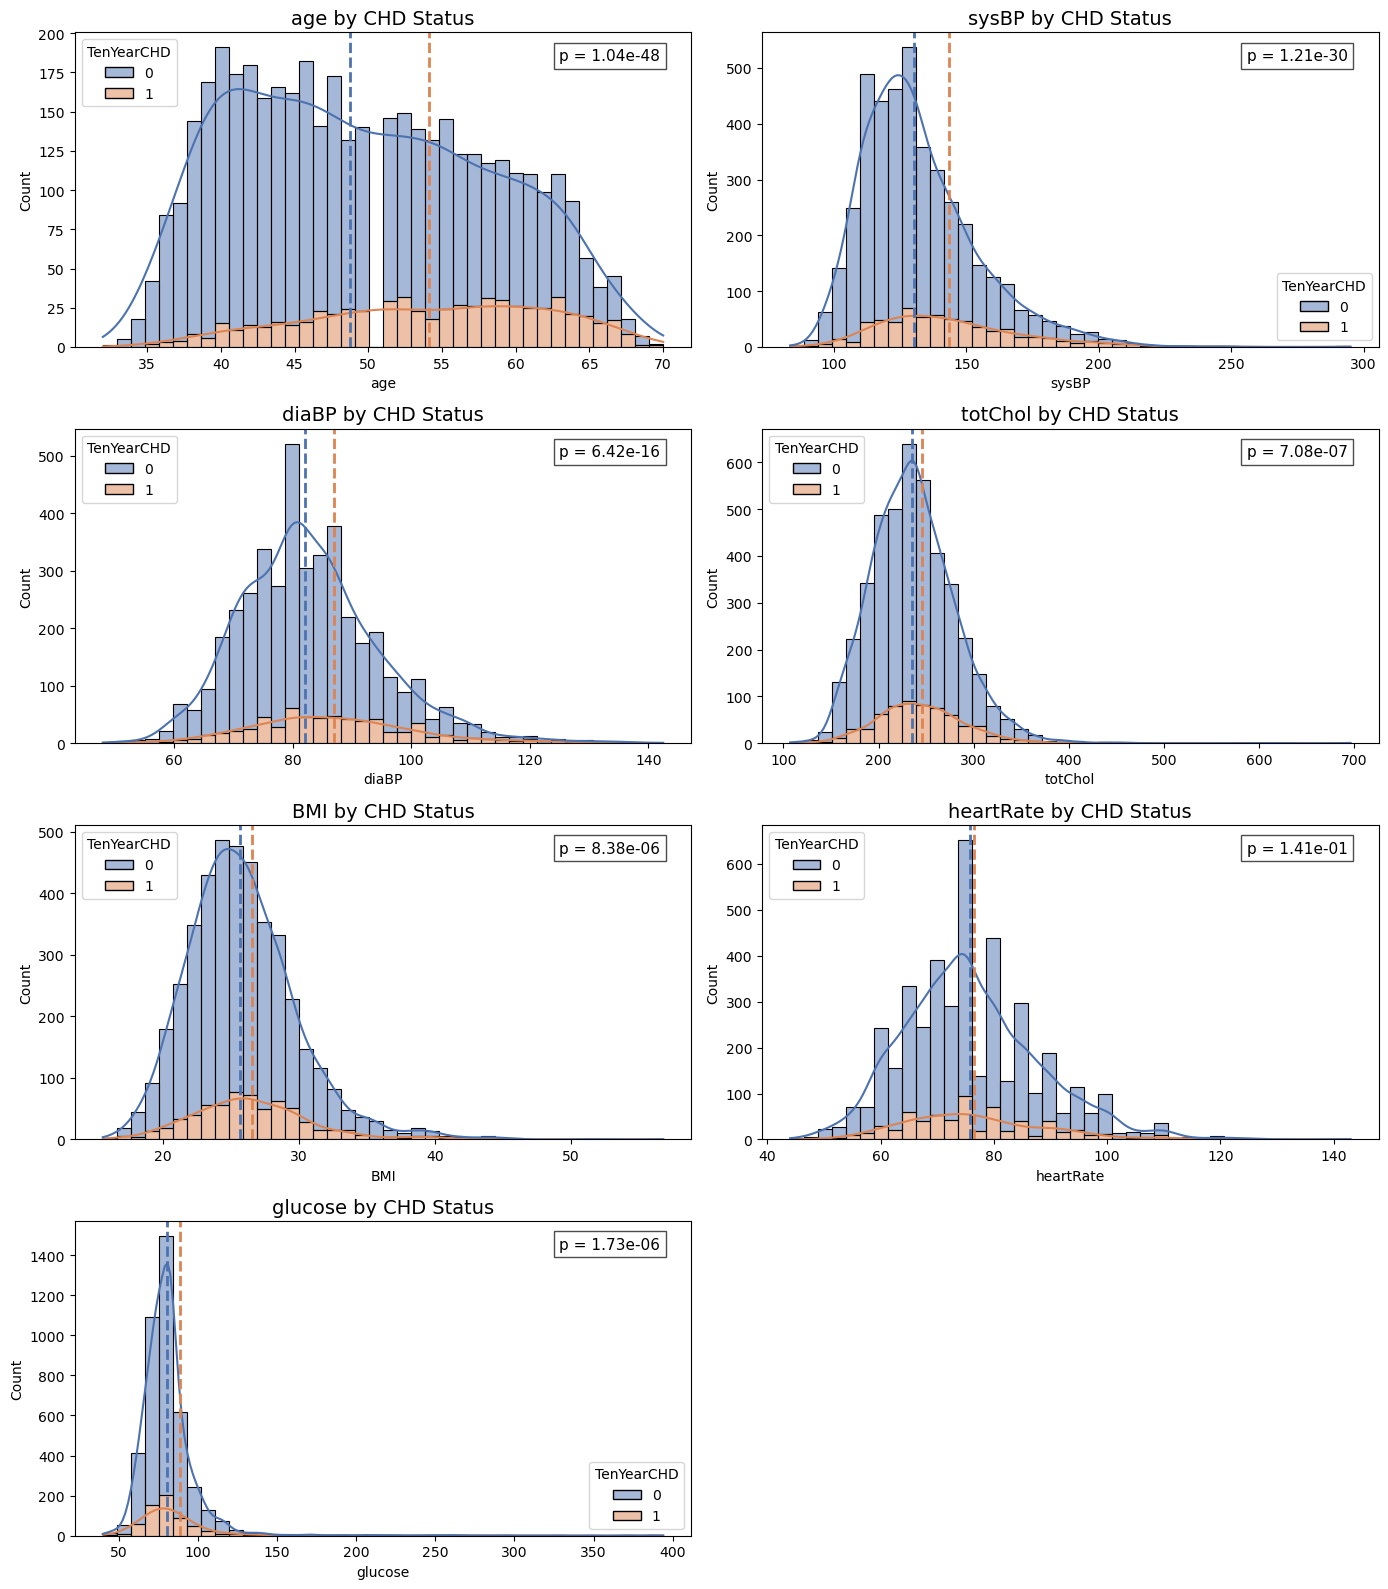

In [16]:
from scipy.stats import ttest_ind

# --- Features to Analyze ---
features = ['age', 'sysBP', 'diaBP', 'totChol', 'BMI', 'heartRate', 'glucose']

# Filter dataset
df = data[['TenYearCHD'] + features].dropna()

# Counts for legend labels
counts = df['TenYearCHD'].value_counts()
legend_labels = [f"No CHD (0): {counts[0]} records", f"CHD (1): {counts[1]} records"]

# Grid settings
n_cols = 2
n_rows = (len(features) + 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
axes = axes.flatten()

for idx, feature in enumerate(features):
    ax = axes[idx]
    
    # Subset for analysis
    group0 = df[df['TenYearCHD'] == 0][feature]
    group1 = df[df['TenYearCHD'] == 1][feature]
    
    # Means
    mean_0, mean_1 = group0.mean(), group1.mean()
    
    # T-test
    t_stat, p_val = ttest_ind(group0, group1, equal_var=False)
    
    # Plot histogram + KDE
    sns.histplot(data=df, x=feature, hue='TenYearCHD', multiple='stack', kde=True, bins=40,
                 palette=['#4C72B0', '#DD8452'], ax=ax)
    
    # Add mean lines
    ax.axvline(mean_0, color='#4C72B0', linestyle='--', linewidth=2)
    ax.axvline(mean_1, color='#DD8452', linestyle='--', linewidth=2)
    
    # Title and labels
    ax.set_title(f'{feature} by CHD Status', fontsize=14)
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    
    # Add p-value annotation
    ax.text(0.95, 0.95, f'p = {p_val:.2e}', transform=ax.transAxes,
            ha='right', va='top', fontsize=11,
            bbox=dict(facecolor='white', alpha=0.7))

# Remove unused subplots if any
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


Lastly, the data was split into a training and test set using the predictors that had the strongest relationship displayed on the correlation matrix to the TenYearCHD variable. 

In [17]:
x_train, x_test, y_train, y_test = train_test_split(
    data[ ['prevalentHyp', 'sysBP', 'diaBP', 'glucose', 'age'] ], 
    data.TenYearCHD, test_size=0.1, random_state=9)

### Model Identifying & Tuning

In [18]:
# Standardize features (only needed for logistic regression)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

For our models we have to be careful of a couple of things, so class weights were changed to balanced, this is because the rate of NOCHD to CHD is almost a 80/20 split, not doing this will lead to missing a bunch of true positives, so the model gets trained on what NOCHD looks like rather than what CHD looks like. The other change is the threshold value for what CHD looks like lowering it from .5 to .3.

Logistic Regression
              precision    recall  f1-score   support

           0       0.93      0.65      0.76       365
           1       0.24      0.69      0.36        59

    accuracy                           0.65       424
   macro avg       0.59      0.67      0.56       424
weighted avg       0.83      0.65      0.71       424

Accuracy: 0.6533018867924528


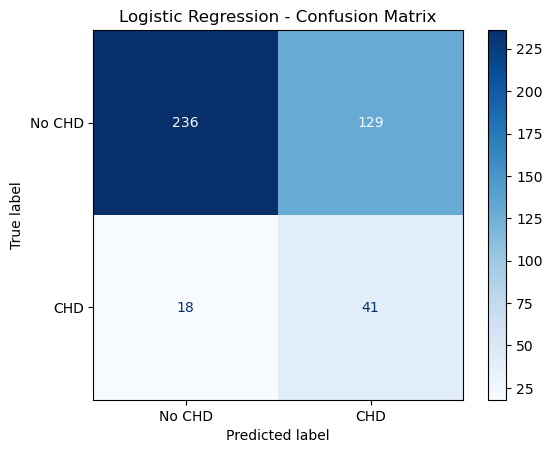

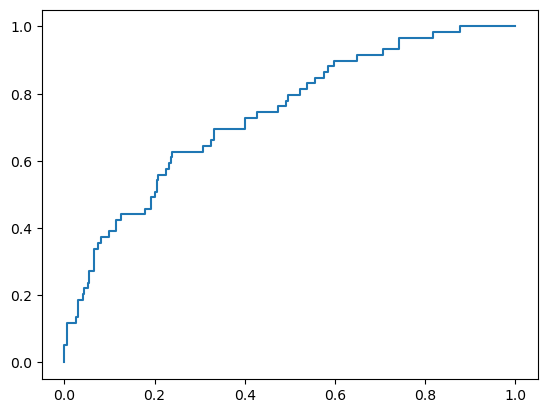

In [19]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

lr = LogisticRegression(max_iter=1000, class_weight = 'balanced')
lr.fit(x_train_scaled, y_train)
y_pred_lr = lr.predict(x_test_scaled)

print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=["No CHD", "CHD"])
disp_lr.plot(cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

probs_lr = lr.predict_proba(x_test_scaled)[:, 1]
y_pred_custom = (probs_lr >= 0.3).astype(int)
fpr_lr, tpr_lr, _ = roc_curve(y_test, probs_lr)
auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression (AUC = {:.2f})".format(auc_lr))

Decision Tree Classifier with the decision tree graphic

This decision tree was similar to the Logistic Regression model as we are predicting decently at our true positive level at 41 cases identified, but had a lower accuracy with only 54%

Decision Tree
              precision    recall  f1-score   support

           0       0.91      0.51      0.65       365
           1       0.19      0.69      0.29        59

    accuracy                           0.54       424
   macro avg       0.55      0.60      0.47       424
weighted avg       0.81      0.54      0.60       424

Accuracy: 0.535377358490566


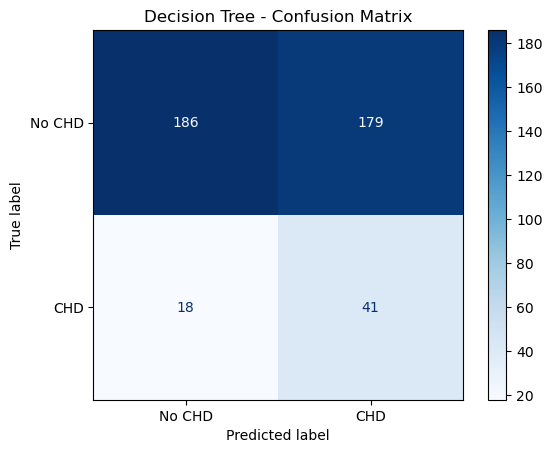

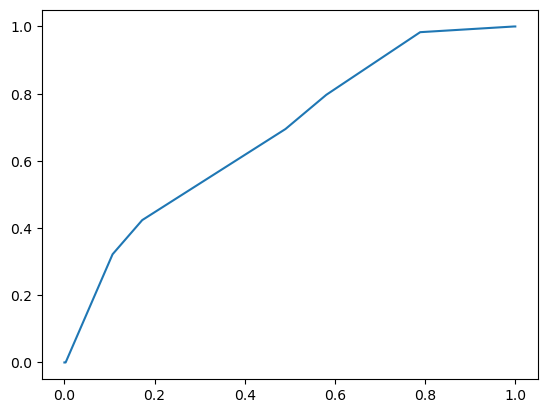

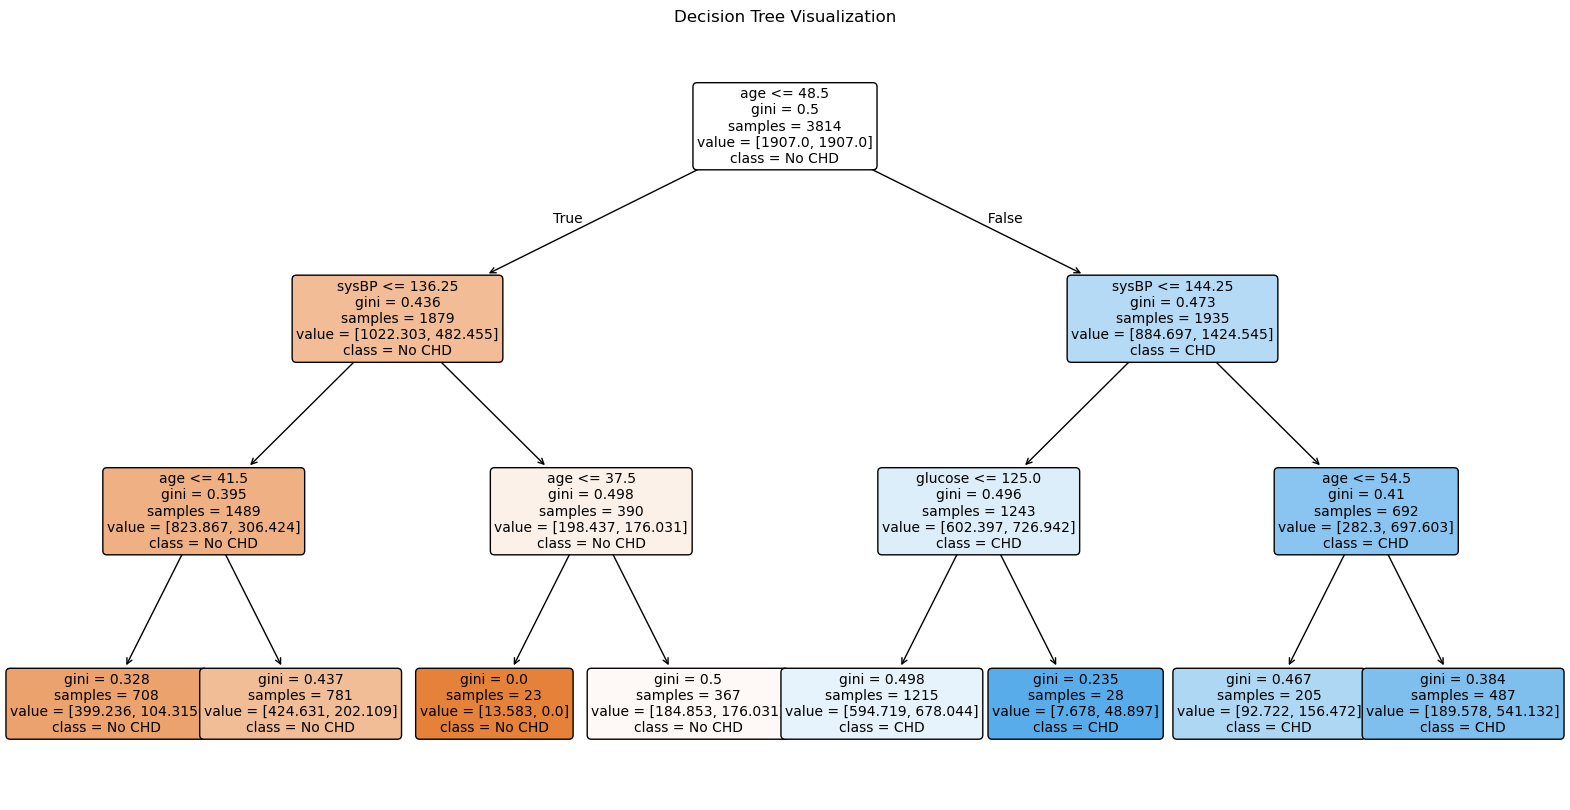

In [20]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt = DecisionTreeClassifier(max_depth=3, class_weight = 'balanced', random_state=9)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

print("Decision Tree")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=["No CHD", "CHD"])
disp_dt.plot(cmap="Blues")
plt.title("Decision Tree - Confusion Matrix")
plt.show()

probs_dt = dt.predict_proba(x_test)[:, 1]
y_pred_custom = (probs_dt >= 0.3).astype(int)
fpr_dt, tpr_dt, _ = roc_curve(y_test, probs_dt)
auc_dt = auc(fpr_dt, tpr_dt)
plt.plot(fpr_dt, tpr_dt, label="Decision Tree (AUC = {:.2f})".format(auc_dt))

plt.figure(figsize=(20, 10))
plot_tree(dt, 
          feature_names=x_train.columns, 
          class_names=["No CHD", "CHD"], 
          filled=True, 
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

Random Forest has the same level of accuaracy as the Logistic Regression at 65%, but only catches 39 of the 54 cases. The Logistic Regression model was able to catch 41 of the 59 cases. Logistic Regression is the best performer and Random Forest was the most accurate. If the priority will be to catch as many true cases as possible, Logistic Regression is the promising.

Improvements can to our model can be done by tuning our parameters, adjusting classification thresholds, and testing advanced ensemble methods.

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.65      0.76       365
           1       0.23      0.66      0.34        59

    accuracy                           0.65       424
   macro avg       0.58      0.65      0.55       424
weighted avg       0.83      0.65      0.70       424

AUC Score: 0.7300208962154633


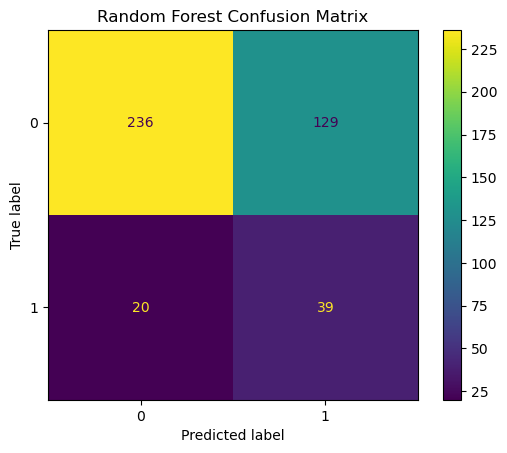

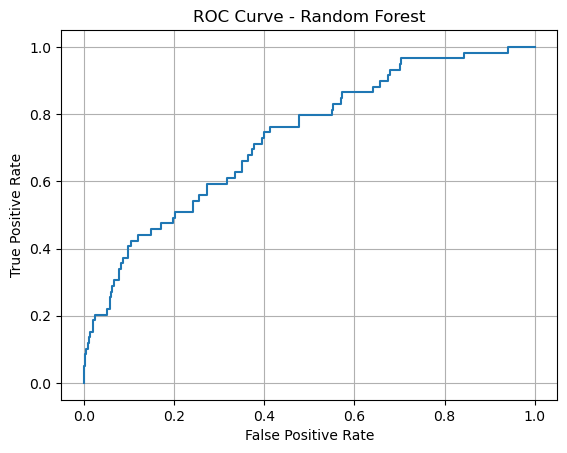

In [21]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, class_weight = 'balanced', random_state=42)
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
y_probs = rf_model.predict_proba(x_test)[:, 1]
y_pred_custom = (y_probs >= 0.3).astype(int)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_probs))

#Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rf_model, x_test, y_test)
plt.title("Random Forest Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.grid()
plt.show()